In [1]:
import numpy as np
import matplotlib.pylab as plt
stutti=[]
stutti_ubt=[]
ttutti=[]
ttutti_ubt=[]
it=[8,9,10,11]
def READ(name, name_time):
    f = open(name, "r")
    # modo stupido per leggere tutti i tempi (però funge...), forse un giorno scriverò qualcosa di meglio
    out=f.readlines()
    p4=[] ; p8=[] ; p12=[] ; p16=[] ; p20=[] ; p24=[] 
    p28=[] ; p32=[] ; p36=[] ; p40=[] ; p44=[] ; p48=[] 
    for i in range(4):
        p4.append(float(out[i+2]))
    for i in range(8):
        p8.append(float(out[i+2+5]))  
    for i in range(12):
        p12.append(float(out[i+2+5+9])) 
    for i in range(16):
        p16.append(float(out[i+2+5+9+13])) 
    for i in range(20):
        p20.append(float(out[i+2+5+9+13+17])) 
    for i in range(24):
        p24.append(float(out[i+2+5+9+13+17+21])) 
    for i in range(28):
        p28.append(float(out[i+2+5+9+13+17+21+25])) 
    for i in range(32):
        p32.append(float(out[i+2+5+9+13+17+21+25+29])) 
    for i in range(36):
        p36.append(float(out[i+2+5+9+13+17+21+25+29+33])) 
    for i in range(40):
        p40.append(float(out[i+2+5+9+13+17+21+25+29+33+37])) 
    for i in range(44):
        p44.append(float(out[i+2+5+9+13+17+21+25+29+33+37+41]))
    for i in range(48):
        p48.append(float(out[i+2+5+9+13+17+21+25+29+33+37+41+45])) 
    f.close()
    time=[]
    time.append(float(out[0]))
    time.append(max(p4)); time.append(max(p8)); time.append(max(p12)); time.append(max(p16))
    time.append(max(p20)); time.append(max(p24)); time.append(max(p28)); time.append(max(p32))
    time.append(max(p36)); time.append(max(p40)); time.append(max(p44)); time.append(max(p48))
    del p4, p8, p12, p16, p20, p24, p28, p32, p36, p40, p44, p48
    time = np.asarray(time)
    f = open(name_time,"r")
    bintime=[]
    out=f.readlines()
    for i in range(0,25,2): #cosi uso l'elapsed time
        tmp = out[i].split(" ")[2]
        tmp = tmp.replace("elapsed", "")
        tmp = tmp.split(":")
        bintime.append(float(tmp[0])*60 + float(tmp[1]))  
    ''' 
    # così uso l' user time
    numero=1
    for i in range(0,25,2):
        tmp=''
        for l in out[i]:
            if (l.isnumeric() or l=='.'):
                tmp += l
            else:
                break
        bintime.append(float(tmp)/numero)
        numero=(i+2)*2
    '''
    f.close()
    bintime = np.asarray(bintime)
    return time, bintime

def READ11(name, name_time):
    f = open(name, "r")
    # modo stupido per leggere tutti i tempi (però funge...), forse un giorno scriverò qualcosa di meglio
    out=f.readlines()
    p12=[] ; p24=[] ; p48=[] 
    for i in range(12):
        p12.append(float(out[i+2])) 
    for i in range(24):
        p24.append(float(out[i+2+13])) 
    for i in range(48):
        p48.append(float(out[i+2+13+25])) 
    f.close()
    time=[]
    time.append(float(out[0])); time.append(max(p12)); time.append(max(p24));time.append(max(p48))
    del p12, p24, p48
    time = np.asarray(time)
    f = open(name_time,"r")
    bintime=[]
    out=f.readlines()
    for i in range(0,7,2):
        tmp = out[i].split(" ")[2]
        tmp = tmp.replace("elapsed", "")
        tmp = tmp.split(":")
        bintime.append(float(tmp[0])*60 + float(tmp[1]))  
    f.close()
    bintime = np.asarray(bintime)
    return time, bintime

def ERROR(t1, t2, t3):
    res=[]
    for i in range(len(t1)):
        tmax=max(t1[i],t2[i],t3[i])
        tmin=min(t1[i],t2[i],t3[i])
        res.append((tmax-tmin)/2)
    return np.asarray(res)

In [5]:
n=11
tipo='w'
P=[1,4,8,12,16,20,24,28,32,36,40,44,48]
if (n==11 and tipo=='w'): 
    func_read=READ11
    P=[1,12,24,48]
else: func_read=READ
t1, bt1 = func_read('out.mpi.'+tipo+str(n)+'.1','out.time.mpi.'+tipo+str(n)+'.1')
t2, bt2 = func_read('out.mpi.'+tipo+str(n)+'.2','out.time.mpi.'+tipo+str(n)+'.2')
t3, bt3 = func_read('out.mpi.'+tipo+str(n)+'.3','out.time.mpi.'+tipo+str(n)+'.3')
tm = ( t1 + t2 + t3 )/3
btm = ( bt1 + bt2 + bt3 )/3
te = ERROR(t1,t2,t3)
bte = ERROR(bt1,bt2,bt3)
S = tm[0]/tm
#Se = te[0]/S + tm[0]*te/S**2 ## ??
Sb = btm[0]/btm
#Sbe = bte[0]/Sb + btm[0]*bte/Sb**2  ##??
ttutti.append(tm)
ttutti_ubt.append(btm)
stutti.append(S)
stutti_ubt.append(Sb)

In [ ]:
if n<10: nn='0'+str(n)
else: nn=str(n)

if tipo=='s': tipol='strong'
elif tipo=='w': tipol='weak'

if n==11 and tipo=='s': leng=[0,3,6,12]
else: leng=range(len(t1))
    
f = open(tipol+"-scalability-10to"+nn+".csv","w")
f.write('#header line: GPU processors avg,error_bar,run1,run2,run3,\n')  
for i in leng:
    f.write('%2d, %8f, %8f, %8f, %8f, %8f\n' %(P[i],tm[i],te[i],t1[i],t2[i],t3[i]))
f.close()

In [ ]:
_=plt.errorbar(P,S, label='S')
_=plt.errorbar(P,Sb, label='Sb')
_=plt.legend() ; plt.xlabel('P') ; plt.ylabel('S')
if tipo=='s': _=plt.title(r"Iterations=$10^{%d}$"%n)
elif tipo=='w': _=plt.title(r"Iterations=P$\cdot 10^{%d}$"%n)
if  tipo =='s':
    _=plt.grid()
    _=plt.plot(P,P)
elif tipo =='w':
    _=plt.plot(P,np.ones((len(P))))

In [ ]:
_=plt.errorbar(P,tm,yerr=te, label='t')
_=plt.errorbar(P,btm,yerr=bte, label='ubt')
_=plt.legend() ; _=plt.xlabel('P'); _=plt.ylabel('time (avg)')
if tipo=='s': _=plt.title(r"Iterations=$10^{%d}$"%n)
elif tipo=='w': _=plt.title(r"Iterations=P$\cdot 10^{%d}$"%n)

/home/matti/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


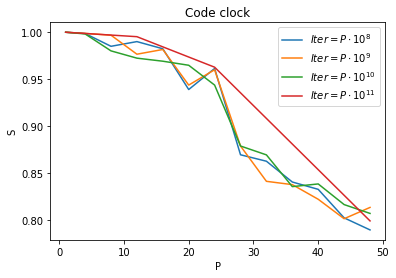

In [6]:
P=[1,4,8,12,16,20,24,28,32,36,40,44,48]
for i in range(len(stutti)-1):
    if tipo=='s': lab=r'$Iter=10^{%d}$'%it[i]
    elif tipo=='w': lab=r'$Iter=P\cdot 10^{%d}$'%it[i]
    _=plt.errorbar(P,np.asarray(stutti)[i], label=lab)
if tipo=='s': lab=r'$Iter=10^{%d}$'%it[-1]
elif tipo=='w': lab=r'$Iter=P\cdot 10^{%d}$'%it[-1]
_=plt.errorbar([1,12,24,48],np.asarray(stutti)[-1], label=lab)
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.title("Code clock")

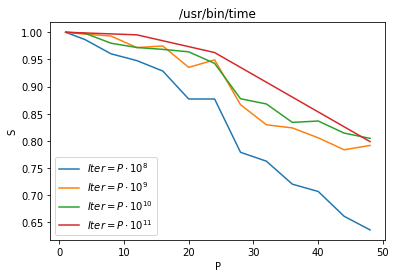

In [7]:
P=[1,4,8,12,16,20,24,28,32,36,40,44,48]
for i in range(len(stutti_ubt)-1):
    if tipo=='s': lab=r'$Iter=10^{%d}$'%it[i]
    elif tipo=='w': lab=r'$Iter=P\cdot 10^{%d}$'%it[i]
    _=plt.errorbar(P,np.asarray(stutti_ubt)[i], label=lab)
if tipo=='s': lab=r'$Iter=10^{%d}$'%it[-1]
elif tipo=='w': lab=r'$Iter=P\cdot 10^{%d}$'%it[-1]
_=plt.errorbar([1,12,24,48],np.asarray(stutti_ubt)[-1], label=lab)
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.title("/usr/bin/time")

In [ ]:
P_overH = [] ; P_overH_ubt=[]
for i in range(len(ttutti)):
    tmp=[] ; tmp_ubt=[]
    for j in range(len(P)):
        tmp.append(ttutti[i][j]*P[j]-ttutti[i][0])
        tmp_ubt.append(ttutti_ubt[i][j]*P[j]-ttutti_ubt[i][0])
    P_overH.append(np.asarray(tmp))
    P_overH_ubt.append(np.asarray(tmp_ubt))

In [ ]:
for i in range(len(ttutti)):
    _=plt.semilogy(P,np.asarray(P_overH)[i], label=r'$Iter=10^{%d}$'%it[i])
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("time")
_=plt.title("Parallel overhead")

In [ ]:
for i in range(len(ttutti_ubt)):
    _=plt.semilogy(P,np.asarray(P_overH_ubt)[i], label=r'$Iter=10^{%d}$'%it[i])
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("time")
_=plt.title("Parallel overhead (usr/bin/time)")